In [75]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [76]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension)인 영행렬을 만든다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [77]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [7]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 0.5606 - accuracy: 0.7576 - val_loss: 0.4616 - val_accuracy: 0.8603
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3672 - accuracy: 0.8894 - val_loss: 0.3590 - val_accuracy: 0.8758
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2693 - accuracy: 0.9194 - val_loss: 0.2994 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2129 - accuracy: 0.9335 - val_loss: 0.2820 - val_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1780 - accuracy: 0.9437 - val_loss: 0.2842 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1487 - accuracy: 0.9559 - val_loss: 0.2821 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1296 - accuracy: 0.9612 - val_loss: 0.2887 - val_accuracy: 0.8878
Epoch 8/20
30

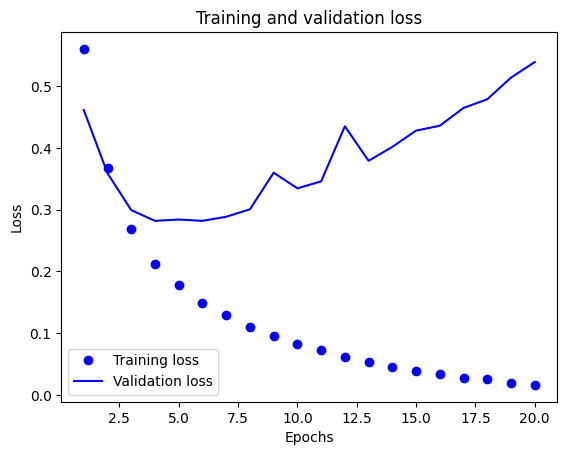

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values= history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

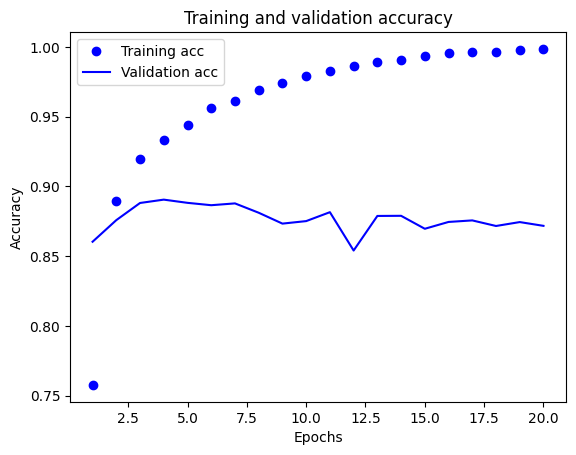

In [11]:
import matplotlib.pyplot as plt

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=6, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/6
49/49 [==============================] - 1s 13ms/step - loss: 0.4723 - accuracy: 0.8165
Epoch 2/6
49/49 [==============================] - 1s 13ms/step - loss: 0.2824 - accuracy: 0.9004
Epoch 3/6
49/49 [==============================] - 1s 12ms/step - loss: 0.2216 - accuracy: 0.9197
Epoch 4/6
49/49 [==============================] - 1s 12ms/step - loss: 0.1889 - accuracy: 0.9322
Epoch 5/6
49/49 [==============================] - 1s 12ms/step - loss: 0.1646 - accuracy: 0.9426
Epoch 6/6
782/782 [==============================] - 3s 3ms/step - loss: 0.3215 - accuracy: 0.8750


In [18]:
results

[0.3214523196220398, 0.8750399947166443]

In [19]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.10042857],
       [0.9999626 ],
       [0.56381375],
       ...,
       [0.04830426],
       [0.03912807],
       [0.53730667]], dtype=float32)

In [104]:
# 모델 훈련
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.4879 - accuracy: 0.7922 - val_loss: 0.4026 - val_accuracy: 0.8293
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2914 - accuracy: 0.8977 - val_loss: 0.2865 - val_accuracy: 0.8875
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2080 - accuracy: 0.9277 - val_loss: 0.2744 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1614 - accuracy: 0.9438 - val_loss: 0.2945 - val_accuracy: 0.8843
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1349 - accuracy: 0.9517 - val_loss: 0.2974 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1041 - accuracy: 0.9649 - val_loss: 0.3498 - val_accuracy: 0.8741
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0846 - accuracy: 0.9722 - val_loss: 0.3837 - val_accuracy: 0.8679
Epoch 8/20
30

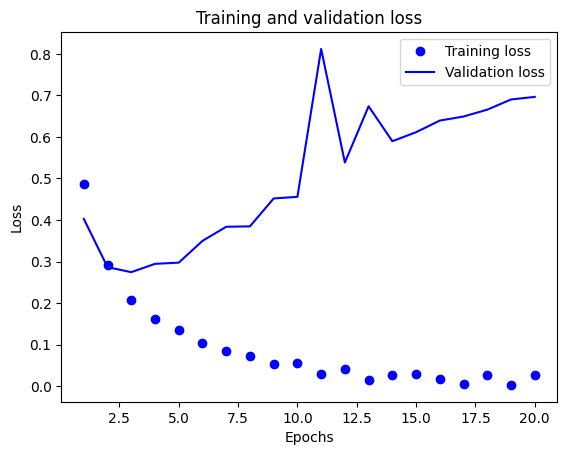

In [105]:
# 훈련과 검증 손실
import matplotlib.pyplot as plt

history_dict = history.history
loss_values= history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

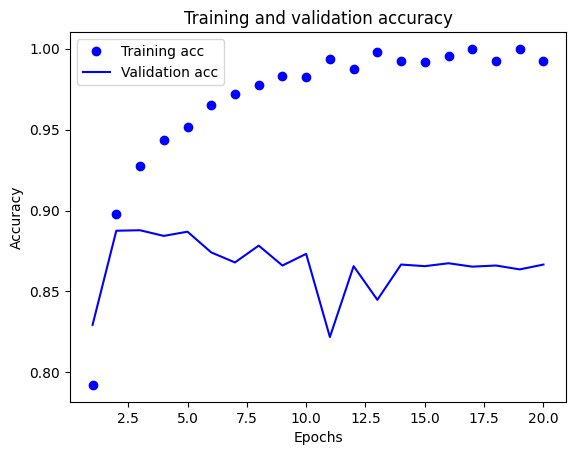

In [106]:
# 훈련과 검증 정확도
import matplotlib.pyplot as plt

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [107]:
# 모델 재훈련 및 테스트 데이터 평가
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=3,
          batch_size=512)

model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 2s 12ms/step - loss: 0.4397 - accuracy: 0.8225
Epoch 2/3
49/49 [==============================] - 1s 11ms/step - loss: 0.2486 - accuracy: 0.9084
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.3066 - accuracy: 0.8755


[0.30655667185783386, 0.8754799962043762]

In [108]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [109]:
print(len(train_data), len(test_data))

8982 2246


In [110]:
train_data[:5]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [111]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [112]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [113]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [132]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [115]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [116]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [117]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [118]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 54ms/step - loss: 2.9343 - accuracy: 0.4974 - val_loss: 1.9717 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 0s 31ms/step - loss: 1.5918 - accuracy: 0.6869 - val_loss: 1.4085 - val_accuracy: 0.7040
Epoch 3/20
16/16 [==============================] - 0s 29ms/step - loss: 1.1873 - accuracy: 0.7489 - val_loss: 1.2113 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 0s 27ms/step - loss: 0.9674 - accuracy: 0.7913 - val_loss: 1.0998 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 0s 27ms/step - loss: 0.7984 - accuracy: 0.8265 - val_loss: 1.0113 - val_accuracy: 0.7760
Epoch 6/20
16/16 [==============================] - 0s 27ms/step - loss: 0.6761 - accuracy: 0.8549 - val_loss: 0.9627 - val_accuracy: 0.7870
Epoch 7/20
16/16 [==============================] - 0s 27ms/step - loss: 0.5627 - accuracy: 0.8804 - val_loss: 0.9279 - val_accuracy: 0.8000
Epoch 8/20
16

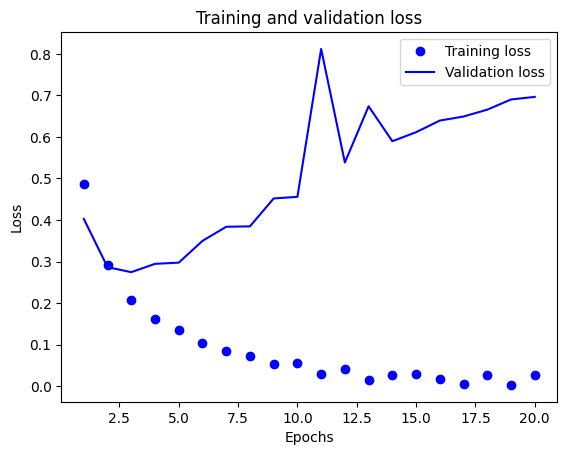

In [119]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

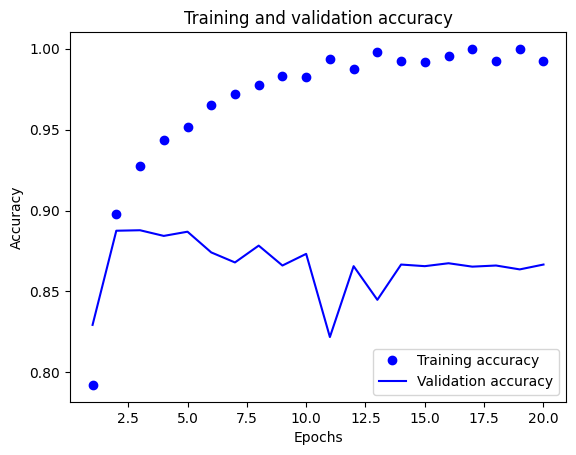

In [120]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [121]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=3,
          batch_size=512)

results = model.evaluate(x_test, y_test)

print(results)

Epoch 1/3
18/18 [==============================] - 2s 32ms/step - loss: 2.6305 - accuracy: 0.5117
Epoch 2/3
18/18 [==============================] - 1s 30ms/step - loss: 1.4822 - accuracy: 0.6845
Epoch 3/3
71/71 [==============================] - 1s 5ms/step - loss: 1.1990 - accuracy: 0.7280
[1.1990054845809937, 0.7279608249664307]


In [122]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)

print(hits_array.mean())

0.1834372217275156


In [123]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 7ms/step


In [124]:
predictions[0].shape

(46,)

In [125]:
np.sum(predictions[0])

0.99999994

In [126]:
np.argmax(predictions[0])

3

In [127]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [129]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 17ms/step - loss: 3.4896 - accuracy: 0.0233 - val_loss: 2.9892 - val_accuracy: 0.0090
Epoch 2/20
63/63 [==============================] - 1s 12ms/step - loss: 2.4351 - accuracy: 0.2553 - val_loss: 1.9375 - val_accuracy: 0.4710
Epoch 3/20
63/63 [==============================] - 1s 12ms/step - loss: 1.6703 - accuracy: 0.6168 - val_loss: 1.5715 - val_accuracy: 0.6490
Epoch 4/20
63/63 [==============================] - 1s 12ms/step - loss: 1.3976 - accuracy: 0.6755 - val_loss: 1.4364 - val_accuracy: 0.6690
Epoch 5/20
63/63 [==============================] - 1s 13ms/step - loss: 1.2553 - accuracy: 0.6929 - val_loss: 1.3732 - val_accuracy: 0.6760
Epoch 6/20
63/63 [==============================] - 1s 12ms/step - loss: 1.1362 - accuracy: 0.7223 - val_loss: 1.3365 - val_accuracy: 0.6940
Epoch 7/20
63/63 [==============================] - 1s 12ms/step - loss: 1.0354 - accuracy: 0.7567 - val_loss: 1.3021 - val_accuracy: 0.7060
Epoch 8/20
63

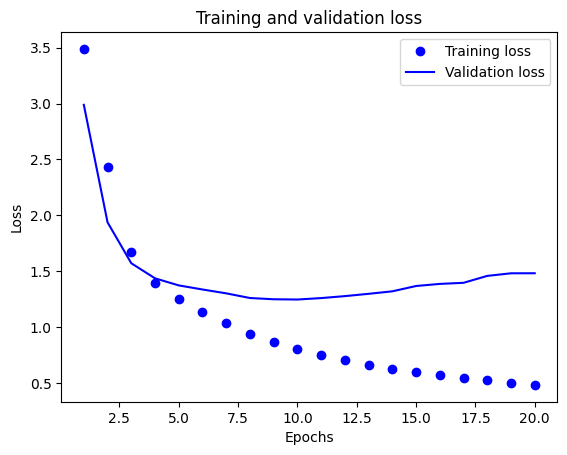

In [130]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

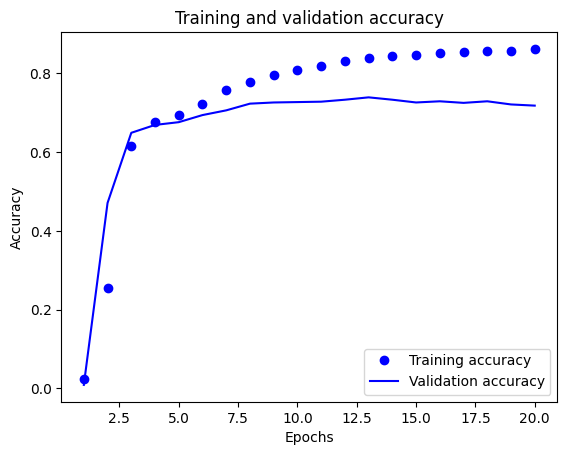

In [131]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [145]:
# 모델 훈련
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 54ms/step - loss: 2.9410 - accuracy: 0.4420 - val_loss: 1.9270 - val_accuracy: 0.5660
Epoch 2/20
16/16 [==============================] - 0s 27ms/step - loss: 1.6095 - accuracy: 0.6517 - val_loss: 1.4193 - val_accuracy: 0.6770
Epoch 3/20
16/16 [==============================] - 0s 27ms/step - loss: 1.2605 - accuracy: 0.7146 - val_loss: 1.2296 - val_accuracy: 0.7150
Epoch 4/20
16/16 [==============================] - 0s 28ms/step - loss: 1.0401 - accuracy: 0.7622 - val_loss: 1.1980 - val_accuracy: 0.7120
Epoch 5/20
16/16 [==============================] - 0s 30ms/step - loss: 0.8942 - accuracy: 0.7958 - val_loss: 1.0750 - val_accuracy: 0.7600
Epoch 6/20
16/16 [==============================] - 0s 29ms/step - loss: 0.7411 - accuracy: 0.8368 - val_loss: 1.0218 - val_accuracy: 0.7680
Epoch 7/20
16/16 [==============================] - 1s 33ms/step - loss: 0.6240 - accuracy: 0.8629 - val_loss: 0.9733 - val_accuracy: 0.7940
Epoch 8/20
16

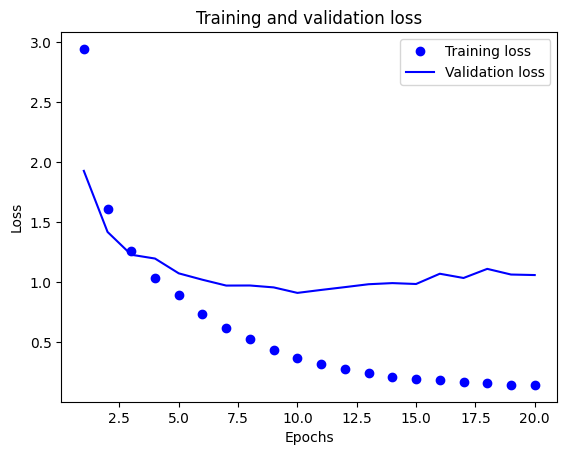

In [146]:
# 훈련과 검증 손실
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

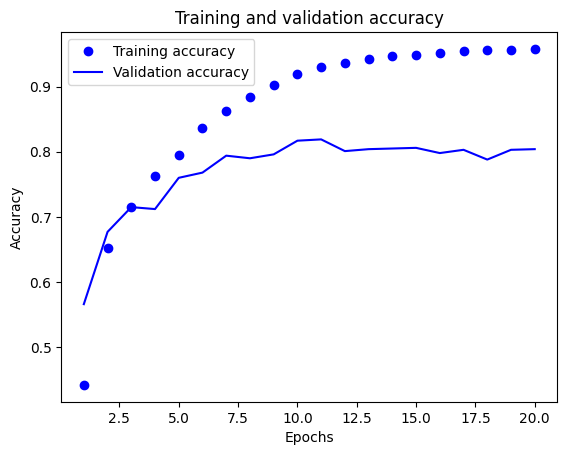

In [147]:
# 훈련과 검증 정확도
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [148]:
# 모델 재훈련 및 테스트 데이터 평가
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=10,
          batch_size=512)

model.evaluate(x_test, y_test)

Epoch 1/10
18/18 [==============================] - 2s 33ms/step - loss: 2.5535 - accuracy: 0.4803
Epoch 2/10
18/18 [==============================] - 1s 29ms/step - loss: 1.5333 - accuracy: 0.6594
Epoch 3/10
18/18 [==============================] - 0s 26ms/step - loss: 1.2318 - accuracy: 0.7224
Epoch 4/10
18/18 [==============================] - 1s 33ms/step - loss: 1.0089 - accuracy: 0.7711
Epoch 5/10
18/18 [==============================] - 0s 25ms/step - loss: 0.8239 - accuracy: 0.8150
Epoch 6/10
18/18 [==============================] - 0s 25ms/step - loss: 0.6835 - accuracy: 0.8429
Epoch 7/10
18/18 [==============================] - 0s 25ms/step - loss: 0.5597 - accuracy: 0.8752
Epoch 8/10
18/18 [==============================] - 0s 25ms/step - loss: 0.4718 - accuracy: 0.8920
Epoch 9/10
18/18 [==============================] - 1s 28ms/step - loss: 0.3946 - accuracy: 0.9098
Epoch 10/10
71/71 [==============================] - 1s 5ms/step - loss: 1.1353 - accuracy: 0.7627


[1.135304570198059, 0.7626892328262329]

In [152]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

In [153]:
print(train_data.shape, test_data.shape)

(404, 13) (102, 13)


In [156]:
print(train_targets)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

In [157]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [158]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [161]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f"#{i}번째 폴드 처리 중")
    
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[: i * num_val_samples],
         train_data[(i + 1) * num_val_samples :]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[: i * num_val_samples],
         train_targets[(i + 1) * num_val_samples :]],
        axis=0
    )
    
    model = build_model()
    model.fit(partial_train_data,
            partial_train_targets,
            epochs=num_epochs,
            batch_size=16,
            verbose=0)              # verbose=0이면 훈련 과정이 출력되지 않는다
    # 검증 세트로 모델을 평가한다
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

#0번째 폴드 처리 중


#1번째 폴드 처리 중
#2번째 폴드 처리 중
#3번째 폴드 처리 중


In [163]:
all_scores

[1.9447104930877686,
 2.5547187328338623,
 2.6054697036743164,
 2.2518203258514404]

In [162]:
np.mean(all_scores)

2.339179813861847

In [164]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f"#{i}번째 폴드 처리 중")
    
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[: i * num_val_samples],
         train_data[(i + 1) * num_val_samples :]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[: i * num_val_samples],
         train_targets[(i + 1) * num_val_samples :]],
        axis=0
    )
    
    model = build_model()
    history = model.fit(partial_train_data,
                        partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs,
                        batch_size=16,
                        verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0번째 폴드 처리 중
#1번째 폴드 처리 중
#2번째 폴드 처리 중
#3번째 폴드 처리 중


In [179]:
len(all_mae_histories[0])

500

In [180]:
average_mae_history = np.zeros((num_epochs, ))
for x in all_mae_histories:
    for i in range(num_epochs):
        average_mae_history[i] += x[i]
average_mae_history /= len(all_mae_histories)

array([19.25743675, 15.66470909, 11.15546894,  7.18207562,  5.25916052,
        4.40675104,  3.95725214,  3.64959991,  3.46015108,  3.2430113 ,
        3.13389581,  3.08761483,  3.0331431 ,  2.9393732 ,  2.8533237 ,
        2.83901215,  2.82079178,  2.7605896 ,  2.69998407,  2.69011623,
        2.66507167,  2.71493942,  2.59752119,  2.63567966,  2.66547817,
        2.60078943,  2.63114661,  2.55983227,  2.5969094 ,  2.56145298,
        2.57687265,  2.51059622,  2.48381701,  2.52455154,  2.50125286,
        2.47166765,  2.47380611,  2.48789603,  2.45796031,  2.49365962,
        2.48145729,  2.44967842,  2.47925192,  2.45698655,  2.49531579,
        2.421042  ,  2.41645309,  2.42898634,  2.40384313,  2.50147507,
        2.41835135,  2.44586673,  2.36040092,  2.38842675,  2.44246933,
        2.45242703,  2.3827554 ,  2.37702069,  2.39530727,  2.40336519,
        2.33983481,  2.36055654,  2.41624609,  2.37136698,  2.33560136,
        2.34874591,  2.36782879,  2.33123058,  2.43273413,  2.33

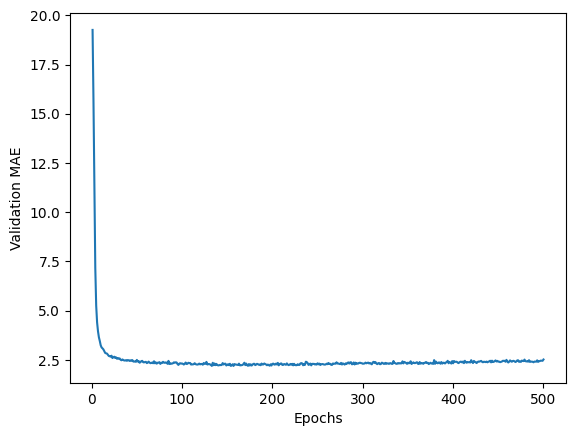

In [181]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

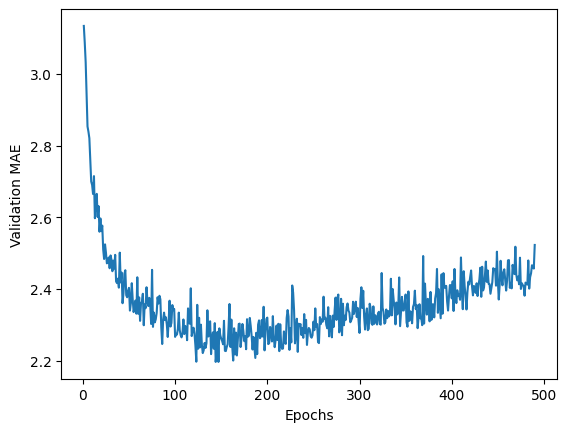

In [183]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [184]:
model = build_model()
model.fit(train_data,
          train_targets,
          epochs=np.argmin(average_mae_history),
          batch_size=16,
          verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 12.7791 - mae: 2.3415


In [185]:
test_mae_score

2.341470956802368

In [186]:
predictions = model.predict(test_data)

4/4 [==============================] - 0s 3ms/step


In [188]:
predictions[0]

array([8.829581], dtype=float32)